## MENA Water Usage Data Visualization
#### Ella Crowder
#### PoE Morocco Final Project
#### 9/26/2023

##### This file is my preliminary exploration of the AQUASTAT dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as math

#### Data Preparation

In [2]:
# Loading MENA data from AQUASTAT
ads = pd.read_csv("data/AQUASTAT Dissemination System.csv", sep = ",")
ads.head()

,Country,Variable,Unit,Symbol,"""1965""","""1970""","""1975""","""1980""","""1985""","""1995""","""2000""","""2002""","""2005""","""2007""","""2010""","""2012""","""2015""","""2017""","""2020"""
0,Afghanistan,Agricultural water withdrawal as % of total r...,%,I,,,,,,33.06,30.61,30.61,30.61,30.61,30.61,30.61,30.61,30.61,30.61
1,Afghanistan,SDG 6.4.1. Industrial Water Use Efficiency,USD/m3,E,,,,,,8.49,9.33,11.5,11.23,13.05,10.07,10.76,9.75,9.32,12.67
2,Afghanistan,SDG 6.4.1. Irrigated Agriculture Water Use Ef...,USD/m3,E,,,,,,0.09,0.06,0.08,0.07,0.1,0.09,0.1,0.11,0.11,0.12
3,Afghanistan,SDG 6.4.1. Services Water Use Efficiency,USD/m3,E,,,,,,7.48,6.92,13.62,18.54,25.39,36.74,45.65,54.53,57.81,57.21
4,Afghanistan,SDG 6.4.1. Water Use Efficiency,USD/m3,I,,,,,,0.19,0.18,0.27,0.35,0.47,0.54,0.65,0.73,0.77,0.8


In [3]:
# Checking datatypes and fixing column names
print(ads.dtypes)
ads.columns = ads.columns.str.replace('"', '')
ads.columns = ads.columns.str.replace(' ', '')

Country      object
 Variable    object
 Unit        object
 Symbol      object
 "1965"      object
 "1970"      object
 "1975"      object
 "1980"      object
 "1985"      object
 "1995"      object
 "2000"      object
 "2002"      object
 "2005"      object
 "2007"      object
 "2010"      object
 "2012"      object
 "2015"      object
 "2017"      object
 "2020"      object
dtype: object


In [4]:
#Checking included countries removing whitespace for variables
unique_variables = ads['Variable'].unique()
ads['Variable'] = ads['Variable'].str.strip()
ads['Variable'] = ads['Variable'].str.lstrip()

for variable in unique_variables:
    print(variable)

 Agricultural water withdrawal as % of total renewable water resources
 SDG 6.4.1. Industrial Water Use Efficiency
 SDG 6.4.1. Irrigated Agriculture Water Use Efficiency
 SDG 6.4.1. Services Water Use Efficiency
 SDG 6.4.1. Water Use Efficiency
 SDG 6.4.2. Water Stress


In [5]:
#Checking included countries removing whitespace for countries
unique_countries = ads['Country'].unique()
ads['Country'] = ads['Country'].str.strip()
ads['Country'] = ads['Country'].str.lstrip()

for country in unique_countries:
    print(country)

Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Côte d'Ivoire
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran (Islamic Republic of)
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan
Lao People's Democratic Republic
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania


In [6]:
# Checking for missing values
missing_values = ads.isnull().sum()
print(missing_values)

Country     0
Variable    0
Unit        0
Symbol      0
1965        0
1970        0
1975        0
1980        0
1985        0
1995        0
2000        0
2002        0
2005        0
2007        0
2010        0
2012        0
2015        0
2017        0
2020        0
dtype: int64


In [7]:
# Filtering for top 7 agriculturally dependent MENA countries
agriculture_countries = ['Morocco', 'Syrian Arab Republic', 'Algeria', 'Yemen', 'Iran', 'Egypt', 'Tunisia']
ads_filt = ads[ads['Country'].isin(agriculture_countries)]
ads_filt.head()

,Country,Variable,Unit,Symbol,1965,1970,1975,1980,1985,1995,2000,2002,2005,2007,2010,2012,2015,2017,2020
13,Algeria,Agricultural water withdrawal as % of total re...,%,E,,,,19.03,22.2,,,,,,,42.77,53.24,57.18,
14,Algeria,Agricultural water withdrawal as % of total re...,%,I,,,,,,26.27,29.39,31.18,34.65,36.97,40.45,,,,57.18
15,Algeria,SDG 6.4.1. Industrial Water Use Efficiency,USD/m3,E,,,,270.99,269.65,62,103.23,103.29,150.85,164.76,163.17,170.23,473.48,324.62,272.11
16,Algeria,SDG 6.4.1. Irrigated Agriculture Water Use Eff...,USD/m3,E,,,,,,0.27,0.27,0.34,0.38,0.43,0.56,0.64,0.84,0.86,0.99
17,Algeria,SDG 6.4.1. Services Water Use Efficiency,USD/m3,E,,,,36.06,43.17,23.44,19.22,20.4,17.57,18.03,20.15,20.49,26.47,23.47,23.87


# 

In [8]:
# Removing extraneous data
water_ds = ads_filt[ads_filt['Variable'] !=  'SDG 6.4.1. Services Water Use Efficiency']

#### Analysis of Water Usage

##### 1. Graphing 'Agricultural water withdrawal as % of total renewable water resources'

In [9]:
# Filtering for agricultural water withdrawal
ag_use = water_ds[water_ds['Variable'] == 'Agricultural water withdrawal as % of total renewable water resources']

# Dropping extra columns
extraneous = ['Unit', 'Symbol', 'Variable']
ag_use = ag_use.drop(columns=extraneous)

ag_use.head()

,Country,1965,1970,1975,1980,1985,1995,2000,2002,2005,2007,2010,2012,2015,2017,2020
13,Algeria,,,,19.03,22.2,,,,,,,42.77,53.24,57.18,
14,Algeria,,,,,,26.27,29.39,31.18,34.65,36.97,40.45,,,,57.18
344,Egypt,,,,,,88.19,102.61,,,,116.52,106.96,108.43,106.7,
345,Egypt,,,,,,,,105.39,109.57,112.35,,,,,106.7
745,Morocco,,,,,,34.08,37.97,38.1,,,31.57,,,,


In [10]:
# Combining duplicate Country rows 
ag_use = ag_use.groupby(['Country']).sum().reset_index()

# Dropping years without data for all countries
nd = ['1965', '1970', '1975', '1980', '1985']
ag_use = ag_use.drop(columns=nd)

ag_use.head()

,Country,1995,2000,2002,2005,2007,2010,2012,2015,2017,2020
0,Algeria,26.27,29.39,31.18,34.65,36.97,40.45,42.77,53.24,57.18,57.18
1,Egypt,88.19,102.61,105.39,109.57,112.35,116.52,106.96,108.43,106.7,106.7
2,Morocco,34.08,37.97,38.1,35.65,34.02,31.57,31.57,31.57,31.57,31.57
3,Syrian Arab Republic,71.66,78.5,85.76,87.31,87.31,87.31,87.31,87.31,87.31,87.31
4,Tunisia,53,46.91,51.31,53.3,54.63,56.63,58.74,63.1,58.31,58.72


In [11]:
# Converting numeric columns to float
numeric_columns = ag_use.columns[1:].tolist()
ag_use[numeric_columns] = ag_use[numeric_columns].apply(pd.to_numeric, errors='coerce')

KeyError: 'Country'

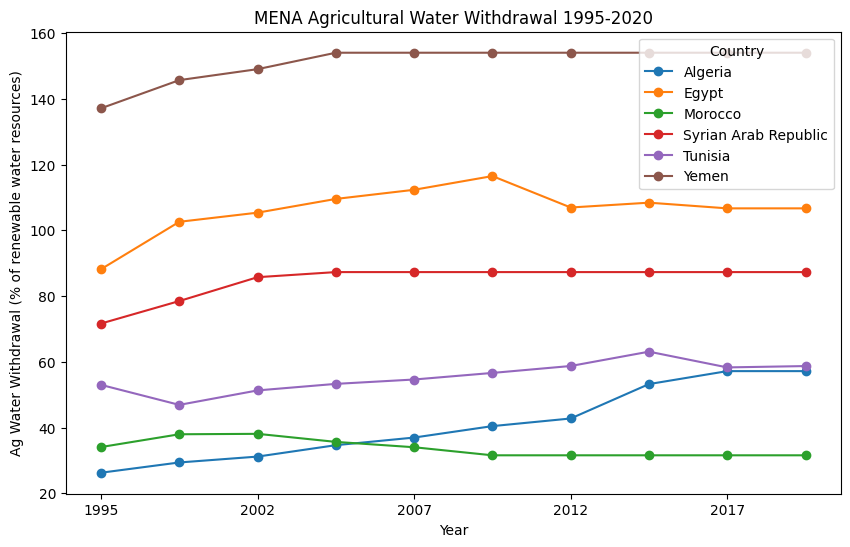

In [12]:
# Plotting the data
ag_use.set_index('Country', inplace=True)
ag_use = ag_use.T
ax = ag_use.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Ag Water Withdrawal (% of renewable water resources)')
plt.title('MENA Agricultural Water Withdrawal 1995-2020')
plt.legend(ag_use['Country'], title='Country')
plt.xticks(rotation=45)

plt.show()


##### 2. Graphing Irrigated Agriculture Water Use Efficiency

In [ ]:
# Filtering for Irrigated Agriculture Water Use Efficiency
irr_use = water_ds[water_ds['Variable'] == 'SDG 6.4.1. Irrigated Agriculture Water Use Efficiency']

# Dropping extra columns
extraneous = ['Unit', 'Symbol', 'Variable']
irr_use = irr_use.drop(columns=extraneous)

In [ ]:
# Dropping years without data for all countries
nd = ['1965', '1970', '1975', '1980', '1985']
irr_use = irr_use.drop(columns=nd)

In [ ]:
# Converting numeric columns to float
numeric_columns = irr_use.columns[1:].tolist()
irr_use[numeric_columns] = irr_use[numeric_columns].apply(pd.to_numeric, errors='coerce')

KeyError: 'Country'

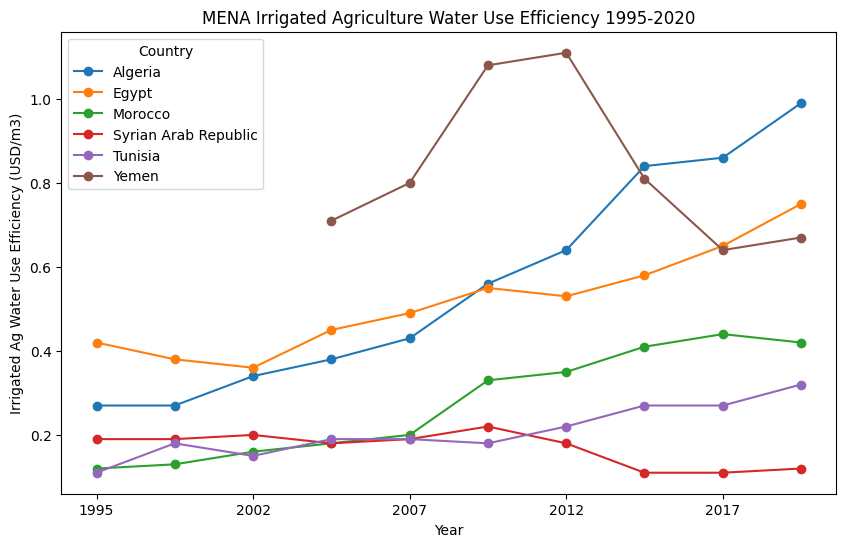

In [ ]:
# Plotting the data
irr_use.set_index('Country', inplace=True)
irr_use = irr_use.T
ax = irr_use.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Irrigated Ag Water Use Efficiency (USD/m3)')
plt.title('MENA Irrigated Agriculture Water Use Efficiency 1995-2020')
plt.legend(irr_use['Country'], title='Country')
plt.xticks(rotation=45)

plt.show()

##### 3. Graphing Overall Water Use Efficiency

In [ ]:
# Filtering Overall Water Use Efficiency
eff_use = water_ds[water_ds['Variable'] == 'SDG 6.4.1. Water Use Efficiency']

# Dropping extra columns
extraneous = ['Unit', 'Symbol', 'Variable']
eff_use = eff_use.drop(columns=extraneous)
eff_use.head(50)

,Country,1965,1970,1975,1980,1985,1995,2000,2002,2005,2007,2010,2012,2015,2017,2020
18,Algeria,,,,,,,,,,,,16.11,15.37,14.55,13.81
19,Algeria,,,,,,13.93,15.15,15.01,16.45,16.67,16.24,,,,
349,Egypt,,,,,,2.18,2.36,2.45,2.68,3,3.4,4.1,4.35,4.39,4.87
750,Morocco,,,,,,2.81,3.06,2.84,3.77,4.55,6.27,7.07,7.72,8.45,8.71
1090,Syrian Arab Republic,,,,,,1.27,1.41,1.45,1.67,1.87,2.13,1.63,1.05,0.98,1.08
1131,Tunisia,,,,,,5.84,8.07,7.92,8.79,9.82,10.53,10.59,10.05,10.62,10.02
1225,Yemen,,,,,,,,,11.81,12.84,13.94,11.5,6.78,5.11,5.19


In [ ]:
# Combining duplicate Country rows 
eff_use = eff_use.groupby(['Country']).sum().reset_index()

print(eff_use)

                Country 1965 1970 1975 1980 1985    1995    2000    2002  \
0               Algeria                            13.93   15.15   15.01   
1                 Egypt                             2.18    2.36    2.45   
2               Morocco                             2.81    3.06    2.84   
3  Syrian Arab Republic                             1.27    1.41    1.45   
4               Tunisia                             5.84    8.07    7.92   
5                 Yemen                                                    

     2005    2007    2010    2012    2015    2017    2020  
0   16.45   16.67   16.24  16.11   15.37   14.55   13.81   
1    2.68       3     3.4     4.1    4.35    4.39    4.87  
2    3.77    4.55    6.27    7.07    7.72    8.45    8.71  
3    1.67    1.87    2.13    1.63    1.05    0.98    1.08  
4    8.79    9.82   10.53   10.59   10.05   10.62   10.02  
5   11.81   12.84   13.94    11.5    6.78    5.11    5.19  


In [ ]:
# Converting numeric columns to float
numeric_columns = eff_use.columns[1:].tolist()
eff_use[numeric_columns] = eff_use[numeric_columns].apply(pd.to_numeric, errors='coerce')

KeyError: 'Country'

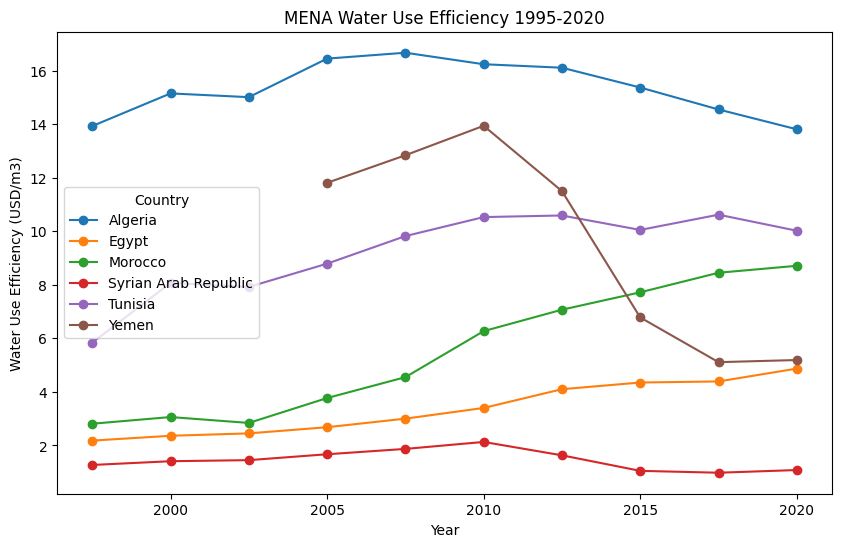

In [ ]:
# Plotting the data
eff_use.set_index('Country', inplace=True)
eff_use = eff_use.T
ax = eff_use.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Water Use Efficiency (USD/m3)')
plt.title('MENA Water Use Efficiency 1995-2020')
plt.legend(eff_use['Country'], title='Country')
plt.xticks(rotation=45)

plt.show()

##### 4. Graphing Overall Water Stress

In [ ]:
# Filtering Water Stress
ws = water_ds[water_ds['Variable'] == 'SDG 6.4.2. Water Stress']

# Dropping extra columns
extraneous = ['Unit', 'Symbol', 'Variable']
ws = ws.drop(columns=extraneous)
ws.head(50)

,Country,1965,1970,1975,1980,1985,1995,2000,2002,2005,2007,2010,2012,2015,2017,2020
20,Algeria,,28.14,35.18,42.21,49.25,70.84,79.26,85.04,92.49,97.46,104.92,109.75,125.99,137.92,137.92
350,Egypt,,,87.8,91.29,94.78,106.52,103.88,109.99,119.15,125.26,134.43,131.69,110.93,141.17,141.17
751,Morocco,,,43.2,48.24,52.8,54.03,60.48,71.1,63.47,58.38,50.75,50.75,50.75,50.75,50.75
1091,Syrian Arab Republic,,,29.74,53.07,76.39,120.15,134.22,145.69,125.96,125.96,125.16,124.36,124.36,124.36,124.36
1132,Tunisia,,,27.17,48.24,58.4,72.34,66.02,71.71,72.85,73.61,79.12,84.27,92.02,89.53,98.11
1226,Yemen,,,,,,150.29,161.14,,169.76,,,,,,
1227,Yemen,,,,,,,,164.59,,169.76,169.76,169.76,169.76,169.76,169.76


In [ ]:
# Combining duplicate Country rows 
ws = ws.groupby(['Country']).sum().reset_index()

# Dropping years without data for all countries
nd = ['1965', '1970']
ws = ws.drop(columns=nd)

print(ws)

                Country   1975   1980   1985     1995     2000     2002  \
0               Algeria  35.18  42.21  49.25    70.84    79.26    85.04   
1                 Egypt   87.8  91.29  94.78   106.52   103.88   109.99   
2               Morocco   43.2  48.24   52.8    54.03    60.48     71.1   
3  Syrian Arab Republic  29.74  53.07  76.39   120.15   134.22   145.69   
4               Tunisia  27.17  48.24   58.4    72.34    66.02    71.71   
5                 Yemen                       150.29   161.14    164.59   

      2005     2007     2010     2012     2015     2017     2020  
0    92.49    97.46   104.92   109.75   125.99   137.92   137.92  
1   119.15   125.26   134.43   131.69   110.93   141.17   141.17  
2    63.47    58.38    50.75    50.75    50.75    50.75    50.75  
3   125.96   125.96   125.16   124.36   124.36   124.36   124.36  
4    72.85    73.61    79.12    84.27    92.02    89.53    98.11  
5  169.76    169.76   169.76   169.76   169.76   169.76   169.76  


In [ ]:
# Converting numeric columns to float
numeric_columns = ws.columns[1:].tolist()
ws[numeric_columns] = ws[numeric_columns].apply(pd.to_numeric, errors='coerce')

KeyError: 'Country'

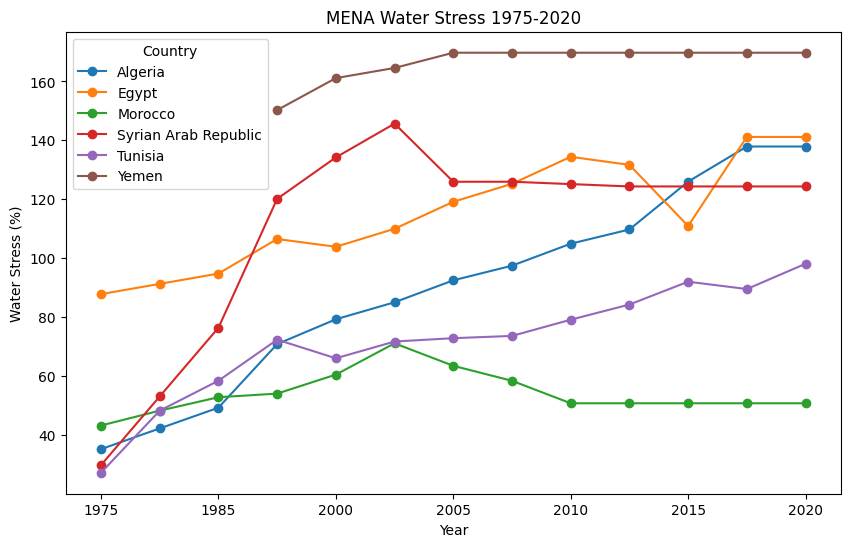

In [ ]:
# Plotting the data
ws.set_index('Country', inplace=True)
ws = ws.T
ax = ws.plot(kind='line', marker='o', figsize=(10, 6))

plt.xlabel('Year')
plt.ylabel('Water Stress (%)')
plt.title('MENA Water Stress 1975-2020')
plt.legend(eff_use['Country'], title='Country')
plt.xticks(rotation=45)

plt.show()